In [1]:
%matplotlib inline
import pandas as pd
import platform
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
input_file = "Eurovision before 2016.csv"
test_file = "eurovision 2016.csv"
test_file2 = "eurovision 2016-2.csv"
test_file_final = "eurovision 2016 final.csv"
points_per_country = 1+2+3+4+5+6+7+8+10+12
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from datetime import datetime
from sklearn.grid_search import GridSearchCV

In [2]:
data = pd.read_csv(input_file)
data.fillna(0, inplace=True)

data['Normalized Score'] = data['Score']/(data['Countries Voting'].apply(float))
data['Normalized Score 2'] = data['Normalized Score'] - points_per_country/(data['Countries competing'].apply(float))
data['Country'] = data['Country'].apply(str.strip)
data['Normalized YT count'] = 0.0
data.loc[data['Videocounts']!=0,'Normalized YT count'] = data.loc[data['Videocounts']!=0,'Videocounts'].apply(float)/data.loc[data['Videocounts']!=0,'Total Videocounts for round'] - 1.0/data[data['Videocounts']!=0]['Countries competing']

In [3]:
print data['Normalized Score 2'].mean()
print data['Normalized YT count'].mean()

3.55702522453e-17
0.000629574694545


In [10]:
test_data = pd.read_csv(test_file_final)
test_data.fillna(0,inplace=True)

test_data['Normalized Score'] = test_data['Score']/(test_data['Countries Voting'].apply(float))
test_data['Normalized Score 2'] = test_data['Normalized Score'] - points_per_country/(test_data['Countries competing'].apply(float))
test_data['Country'] = test_data['Country'].apply(str.strip)
test_data['Normalized YT count'] = 0.0
test_data.loc[test_data['Videocounts']!=0,'Normalized YT count'] = test_data.loc[test_data['Videocounts']!=0,'Videocounts'].apply(float)/test_data.loc[test_data['Videocounts']!=0,'Total Videocounts for round'] - 1.0/test_data[test_data['Videocounts']!=0]['Countries competing']

In [12]:
test_data_sf1 = pd.read_csv(test_file)
test_data_sf1.fillna(0,inplace=True)

test_data_sf1['Normalized Score'] = test_data_sf1['Score']/(test_data_sf1['Countries Voting'].apply(float))
test_data_sf1['Normalized Score 2'] = test_data_sf1['Normalized Score'] - points_per_country/(test_data_sf1['Countries competing'].apply(float))
test_data_sf1['Country'] = test_data_sf1['Country'].apply(str.strip)
test_data_sf1['Normalized YT count'] = 0.0
test_data_sf1.loc[test_data_sf1['Videocounts']!=0,'Normalized YT count'] = test_data_sf1.loc[test_data['Videocounts']!=0,'Videocounts'].apply(float)/test_data_sf1.loc[test_data_sf1['Videocounts']!=0,'Total Videocounts for round'] - 1.0/test_data_sf1[test_data_sf1['Videocounts']!=0]['Countries competing']

In [8]:
drawcount = [0]*27
for i in range(1,27):
    data_set = (data[(data['Draw']==i) ]['Normalized Score 2'] + points_per_country/float(24))*40
    print i, data_set.mean(),  data_set.std(), data_set.count()
    drawcount[i] = drawcount[i-1] + data_set.mean()
print(drawcount[1:])
print((data['Normalized Score 2'].mean()+1.0/24)*40)

1 77.6676816387 67.4864476339 38
2 56.7140519878 51.4696353582 38
3 60.9607013851 66.8766377971 38
4 83.924069439 82.4276865249 38
5 73.45190271 78.5313322365 38
6 100.628932907 87.002618694 38
7 89.9230032047 68.1229868683 38
8 76.9251544531 62.6377989887 38
9 87.623888411 76.2148549575 38
10 111.64716323 100.188708081 38
11 84.2888048273 91.597494028 38
12 97.614188471 83.709715167 38
13 122.9012992 86.7242009406 38
14 109.560842773 88.3168313521 38
15 91.1632796677 73.2862834158 38
16 86.3021854983 77.5153130734 37
17 108.373549944 84.7297466745 34
18 138.079102582 77.4008443563 30
19 101.604251341 78.6293744313 27
20 144.378027416 107.399188905 22
21 111.203761259 68.2074318021 22
22 142.341870313 84.3712580155 22
23 116.013768715 77.326802643 21
24 115.621402669 84.5322815779 18
25 113.482885445 84.6477801137 12
26 68.6994063661 69.9553815682 6
[77.66768163865713, 134.38173362649255, 195.34243501155953, 279.2665044505715, 352.7184071606051, 453.3473400679211, 543.2703432726452, 62

In [14]:
features = ['Draw','Male singer','Female Singer','Duo','Band','Experienced artist','Final','Former Soviet','Baltic','Caucasus','Scandinavia',
            'Tiny Country','Former Yugoslavia','Big Five','Nordic','Orthodox','Mediterranean','East Europe','British Isles',
            'German Speaking','French Speaking','Northwest Europe','Romance Language','Germanic Language','Slavic Language','English Speaking','Normalized YT count']
small_features = ['Draw','Male singer','Female Singer','Duo','Band','Experienced artist','Final','Normalized YT count']

In [10]:
target_features = ['Normalized Score 2']

In [4]:
country_regions = {}
country_regions['Former Soviet'] = ['Russia','Belarus','Ukraine','Latvia','Lithuania','Estonia','Georgia','Moldova','Armenia','Azerbaijan']
country_regions['Baltic'] = ['Latvia','Lithuania','Estonia']
country_regions['Caucasus'] = ['Armenia','Azerbaijan','Georgia']
country_regions['Scandinavia'] =['Denmark','Sweden','Norway']
country_regions['Tiny Country'] = ['San Marino','Monaco','Andorra']
country_regions['Former Yugoslavia']= ['Serbia','Montenegro','Slovenia','Croatia','Macedonia','Bosnia and Herzegovina']
country_regions['Big Five'] = ['United Kingdom','Germany','France','Italy','Spain']
country_regions['Nordic'] = ['Denmark','Sweden','Norway','Iceland','Finland']
country_regions['Orthodox'] = ['Greece','Serbia','Bulgaria','Ukraine','Belarus','Russia','Romania','Moldova','Georgia','Armenia','Montenegro']
country_regions['Mediterranean'] = ['France','Spain','Italy','Monaco','Malta','Albania','Croatia','Greece','Turkey','Cyprus','Israel','Portugal']
country_regions['East Europe'] = ['Poland','Czech Republic','Slovakia','Hungary','Bulgaria','Romania']
country_regions['British Isles'] = ['United Kingdom','Ireland']
country_regions['German Speaking'] = ['Germany','Austria','Switzerland']
country_regions['French Speaking'] = ['France','Switzerland','Belgium']
country_regions['Northwest Europe'] = ['United Kingdom','Belgium','Netherlands','Ireland','Germany']
country_regions['Romance Language'] = ['Portugal','Spain','Andorra','Belgium','France','Switzerland','Italy','San Marino','Romania','Moldova']
country_regions['Germanic Language'] = ['United Kingdom','Ireland','Netherlands','Belgium','Germany','Switzerland','Denmark','Sweden','Iceland','Norway']
country_regions['Slavic Language'] = ['Poland','Czech Republic','Slovakia','Bulgaria','Belarus','Ukraine','Serbia','Croatia','Slovenia','Macedonia','Montenegro','Bosnia and Herzegovina']
country_regions['English Speaking'] = ['United Kingdom','Ireland','Australia']

In [7]:
for k in country_regions:
    data[k] = 0
    data.loc[data['Country'].isin(country_regions[k]),k] = 1

In [14]:
for k in country_regions:
    test_data[k] = 0
    test_data_sf1[k] = 0
    test_data.loc[test_data['Country'].isin(country_regions[k]),k] = 1
    test_data_sf1.loc[test_data_sf1['Country'].isin(country_regions[k]),k] = 1

In [15]:
countries_train_pd = pd.get_dummies(data['Country'])
countries_test_pd = pd.get_dummies(test_data['Country'])
country_col_to_add = np.setdiff1d(countries_train_pd.columns, countries_test_pd.columns)
# add these columns to test, setting them equal to zero
for c in country_col_to_add:
    countries_test_pd[c] = 0
# select and reorder the test columns using the train columns
countries_test_pd = countries_test_pd[countries_train_pd.columns]
countries_test = countries_test_pd.as_matrix()
countries = countries_train_pd.as_matrix()

In [16]:
countries_test_sf1_pd = pd.get_dummies(test_data_sf1['Country'])
country_col_to_add_sf1 = np.setdiff1d(countries_train_pd.columns, countries_test_sf1_pd.columns)
# add these columns to test, setting them equal to zero
for c in country_col_to_add_sf1:
    countries_test_sf1_pd[c] = 0
# select and reorder the test columns using the train columns
countries_test_sf1_pd = countries_test_sf1_pd[countries_train_pd.columns]
countries_test_sf1 = countries_test_sf1_pd.as_matrix()

In [17]:
languages_train_pd = pd.get_dummies(data['Language'])
languages_test_pd = pd.get_dummies(test_data['Language'])
languages_col_to_add = np.setdiff1d(languages_train_pd.columns,languages_test_pd.columns)
for c in languages_col_to_add:
    languages_test_pd[c] = 0
languages_test_pd = languages_test_pd[languages_train_pd.columns]
languages_test = languages_test_pd.as_matrix()
languages = languages_train_pd.as_matrix()

In [18]:
languages_test_sf1_pd = pd.get_dummies(test_data_sf1['Language'])
languages_col_to_add_sf1 = np.setdiff1d(languages_train_pd.columns,languages_test_sf1_pd.columns)
for c in languages_col_to_add_sf1:
    languages_test_sf1_pd[c] = 0
languages_test_sf1_pd = languages_test_sf1_pd[languages_train_pd.columns]
languages_test_sf1 = languages_test_sf1_pd.as_matrix()

In [84]:
total = np.hstack([data[features].as_matrix(),countries,languages])
test_total = np.hstack([test_data[features].as_matrix(),countries_test,languages_test])
target = data[target_features].as_matrix()

In [71]:
from sklearn.grid_search import GridSearchCV
param_grid = {'learning_rate':[0.002],
              'max_depth':[1,2,3,4,5],
              'min_samples_leaf':[1,3,5,7],
              'max_features':[13,15,17,19,21,23],
              'n_estimators':[5000]
             }
est = GradientBoostingRegressor(n_estimators=1000)
gs_cv = GridSearchCV(est,param_grid,n_jobs=4).fit(total,np.ravel(target))
print gs_cv.best_params_
print gs_cv.best_score_

{'max_features': 19, 'n_estimators': 5000, 'learning_rate': 0.002, 'max_depth': 3, 'min_samples_leaf': 3}
0.197669758553


In [72]:
param_grid = {'learning_rate':[0.001,0.002,0.005,0.01,0.02,0.05],
              'max_depth':[3],
              'min_samples_leaf':[3],
              'max_features':[19],
              'n_estimators':[1000,2000,5000,10000]
             }
est = GradientBoostingRegressor()
gs_cv = GridSearchCV(est,param_grid,n_jobs=4).fit(total,np.ravel(target))
print gs_cv.best_params_
print gs_cv.best_score_

{'max_features': 19, 'n_estimators': 2000, 'learning_rate': 0.005, 'max_depth': 3, 'min_samples_leaf': 3}
0.195724223244


In [85]:
tuned_boost = GradientBoostingRegressor(n_estimators=2000,verbose=1,max_features = 19,learning_rate=0.005,max_depth=3,min_samples_leaf=3)
tuned_boost = tuned_boost.fit(total,np.ravel(target))

      Iter       Train Loss   Remaining Time 
         1           4.1743            1.13s
         2           4.1727            0.94s
         3           4.1699            0.90s
         4           4.1669            0.95s
         5           4.1643            0.92s
         6           4.1603            0.93s
         7           4.1571            0.91s
         8           4.1541            0.89s
         9           4.1506            0.91s
        10           4.1470            4.95s
        20           4.1172            4.91s
        30           4.0887            3.62s
        40           4.0583            2.90s
        50           4.0290            2.46s
        60           4.0025            2.18s
        70           3.9773            1.96s
        80           3.9473            1.80s
        90           3.9221            1.68s
       100           3.8919            1.57s
       200           3.6710            1.33s
       300           3.4789            1.08s
       40

In [86]:
sorted(zip(test_data['Country'],tuned_boost.predict(test_total)),key = lambda x: x[1], reverse=True)

[('Russia', 1.7766277747113937),
 ('Ukraine', 0.99974073482125914),
 ('Armenia', 0.83166559495889425),
 ('Sweden', 0.42416625787725432),
 ('Malta', 0.41396337093809255),
 ('Azerbaijan', 0.33681230537932877),
 ('France', 0.32172036860372555),
 ('Serbia', 0.13638361018034734),
 ('Latvia', 0.080818148351959898),
 ('Australia', 0.042259597927323603),
 ('Spain', -0.016295072914955314),
 ('United Kingdom', -0.052586376750956315),
 ('Georgia', -0.16095424868720093),
 ('Italy', -0.24216787461583039),
 ('Cyprus', -0.32432756541444913),
 ('Bulgaria', -0.39642425319618607),
 ('Netherlands', -0.42218463123209771),
 ('Lithuania', -0.47651184878021191),
 ('Poland', -0.60813090364342026),
 ('Belgium', -0.74130452768642185),
 ('Germany', -0.81521427991098161),
 ('Croatia', -0.87029848158722378),
 ('Israel', -0.89377406835479567),
 ('Austria', -0.91741703095891791),
 ('Hungary', -1.1284906201054374),
 ('Czech Republic', -1.7345871324705902)]

In [87]:
predictions = (tuned_boost.predict(test_total)+points_per_country/(test_data['Countries competing'].apply(float)))*test_data['Countries Voting']*2
print sum(predictions)
print points_per_country * test_data['Countries Voting'][0] * 2
pred_outcome = sorted(zip(test_data['Country'],predictions),key = lambda x: x[1], reverse=True)
for l in pred_outcome:
    print l[0], int(l[1])

4499.33306318
4872
Russia 336
Ukraine 271
Armenia 257
Sweden 223
Malta 222
Azerbaijan 215
France 214
Serbia 198
Latvia 194
Australia 190
Spain 186
United Kingdom 182
Georgia 173
Italy 167
Cyprus 160
Bulgaria 154
Netherlands 151
Lithuania 147
Poland 136
Belgium 125
Germany 118
Croatia 114
Israel 112
Austria 110
Hungary 92
Czech Republic 41


In [88]:
#  np.hstack([data[features].as_matrix(),countries,languages])
total_pd = pd.concat([data[features],countries_train_pd,languages_train_pd],axis=1)
data_pd = pd.concat([total_pd,data['Year'],data['Normalized Score 2'],data['Normalized Score']],axis=1)
data_2014 = data_pd[data_pd['Year']!=2015].drop(['Year','Normalized Score 2','Normalized Score'],axis = 1)
target_2014_pd = data_pd[data_pd['Year']!= 2015]['Normalized Score 2']
target_2014 = data_pd[data_pd['Year']!= 2015]['Normalized Score 2'].as_matrix()
data_2015 = data_pd[data_pd['Year']==2015].drop(['Year','Normalized Score','Normalized Score 2'],axis = 1)
country_data_2015 = data[data['Year']==2015][['Country','Countries competing','Countries Voting','Final']]
data_final_2015 = data_2015[country_data_2015['Final']==1]
country_data_final_2015 = country_data_2015[country_data_2015['Final']==1]
target_2015 = data_pd[data_pd['Year']==2015]['Normalized Score 2']
target_final_2015 = (target_2015[country_data_2015['Final']==1] +points_per_country/(country_data_final_2015['Countries competing'].apply(float)))*country_data_final_2015['Countries Voting']   

In [33]:
tuned_boost_2014 = GradientBoostingRegressor(n_estimators=1000,verbose=1,max_features = 12,learning_rate=0.01,max_depth=4)
tuned_boost_2014 = tuned_boost.fit(data_2014,np.ravel(target_2014))
predict_2015 = np.round((tuned_boost.predict(data_final_2015)+points_per_country/(country_data_final_2015['Countries competing'].apply(float)))*40)

      Iter       Train Loss   Remaining Time 
         1           4.0036            0.65s
         2           3.9940            0.57s
         3           3.9845            0.49s
         4           3.9743            0.49s
         5           3.9674            0.50s
         6           3.9614            0.49s
         7           3.9557            0.48s
         8           3.9441            0.46s
         9           3.9343            0.47s
        10           3.9255            0.47s
        20           3.8449            0.43s
        30           3.7657            0.42s
        40           3.7110            0.40s
        50           3.6515            0.39s
        60           3.6038            0.38s
        70           3.5386            0.38s
        80           3.4817            0.38s
        90           3.4252            0.39s
       100           3.3818            0.38s
       200           2.9890            0.33s
       300           2.7157            0.28s
       40

In [34]:
countries_2015 = data[(data['Year']==2015) & data['Final']==1]['Country'].to_frame(name='Country')
print country_data_final_2015['Countries Voting'].mean()
print country_data_final_2015['Countries competing'].mean()
#print data_2014['Germany']
mse_2015 = 0
mse_a_2015 = 0
countries_2015['avg'] = 0
countries_voting = country_data_final_2015['Countries Voting'].mean()
countries_in_final = country_data_final_2015['Countries competing'].mean()
for c in range(len(countries_2015.values)):
    name = countries_2015.values[c][0]
    if name == "Australia":
        avg = 106
    else:
        avg = np.round((target_2014_pd[data_2014[name]==1].mean()+points_per_country/countries_voting)*40)
    mse_2015 += int(target_final_2015[c+797]-predict_2015[c+797])**2
    mse_a_2015 += int(target_final_2015[c+797]-avg)**2
    print name,int(target_final_2015[c+797]),int(predict_2015[c+797]),int(avg),int(target_final_2015[c+797]-predict_2015[c+797])**2,int(target_final_2015[c+797]-avg)**2
print mse_2015
print mse_a_2015

40.0
27.0
Slovenia 39 15 14 576 625
France 4 14 17 81 144
Israel 97 65 45 1024 2704
Estonia 106 52 55 2916 2601
United Kingdom 5 54 26 2401 441
Armenia 34 98 105 4096 5041
Lithuania 30 49 27 361 9
Serbia 53 53 116 0 3969
Norway 102 102 84 0 324
Sweden 365 118 123 61009 58564
Cyprus 10 50 27 1521 256
Australia 196 76 106 14400 8100
Belgium 217 74 39 20449 31684
Austria 0 54 56 2916 3136
Greece 23 96 122 5329 9801
Montenegro 44 56 3 144 1681
Germany 0 86 53 7396 2809
Poland 10 50 18 1600 64
Latvia 186 75 33 12321 23409
Romania 35 84 79 2401 1936
Spain 15 75 23 3600 64
Hungary 19 84 58 4225 1521
Georgia 51 122 60 5041 81
Azerbaijan 49 191 139 20164 8100
Russia 303 220 125 6889 31684
Albania 34 153 52 14161 324
Italy 292 79 77 45369 46225
240390
245297


In [36]:
#tuned_boost_2014 = GradientBoostingRegressor(n_estimators=1000,verbose=1,max_features = 9,learning_rate=0.11,max_depth=4)
#tuned_boost_2014 = tuned_boost.fit(data_2014,np.ravel(target_2014))
#predictions_2015 = (tuned_boost.predict(data_final_2015.as_matrix())+points_per_country/(country_data_final_2015['Countries competing'].apply(float)))*country_data_final_2015['Countries Voting']

print sorted(zip(country_data_final_2015['Country'],target_final_2015,predict_2015),key = lambda x: x[1], reverse=True)
print sum(predict_2015)

[('Sweden', 365.0, 118.0), ('Russia', 303.00000000000006, 220.0), ('Italy', 292.0, 79.0), ('Belgium', 217.0, 74.0), ('Australia', 196.0, 76.0), ('Latvia', 186.0, 75.0), ('Estonia', 106.0, 52.0), ('Norway', 102.0, 102.0), ('Israel', 97.0, 65.0), ('Serbia', 53.0, 53.0), ('Georgia', 51.0, 122.0), ('Azerbaijan', 49.0, 191.0), ('Montenegro', 44.0, 56.0), ('Slovenia', 39.0, 15.0), ('Romania', 35.0, 84.0), ('Armenia', 34.0, 98.0), ('Albania', 34.0, 153.0), ('Lithuania', 30.0, 49.0), ('Greece', 23.0, 96.0), ('Hungary', 19.000000000000004, 84.0), ('Spain', 15.0, 75.0), ('Cyprus', 10.999999999999996, 50.0), ('Poland', 10.0, 50.0), ('United Kingdom', 5.0, 54.0), ('France', 4.0000000000000036, 14.0), ('Austria', 0.0, 54.0), ('Germany', 0.0, 86.0)]
2245.0


In [89]:
sorted(zip(list(total_pd.columns.values),tuned_boost.feature_importances_),key = lambda x: x[1],reverse = True)

[('Normalized YT count', 0.16620627546332337),
 ('Draw', 0.10847819105939692),
 ('Ukraine', 0.02996788711845752),
 ('Serbian', 0.02996537715421525),
 ('Russia', 0.02906636551051724),
 ('Tiny Country', 0.027963654544504397),
 ('Scandinavia', 0.027584530860755775),
 ('Greece', 0.027077100613046377),
 ('Final', 0.026883212331977976),
 ('Slavic Language', 0.026366903270993003),
 ('English', 0.025684799134413676),
 ('Orthodox', 0.024453606761273367),
 ('Serbia and Montenegro', 0.023766663745216909),
 ('Bosnian', 0.023035802231729626),
 ('Experienced artist', 0.022312052235974905),
 ('Italy', 0.02144788900888189),
 ('Sweden', 0.020397798592879119),
 ('Turkey', 0.017872233905777898),
 ('Band', 0.01501726014665597),
 ('Montenegro', 0.014562542529245891),
 ('Nordic', 0.014416064295373655),
 ('British Isles', 0.013373327459667843),
 ('English,?Armenian', 0.012694618428208057),
 ('Czech Republic', 0.01230361177880949),
 ('Female Singer', 0.012102493505124748),
 ('Switzerland', 0.01091694697962333

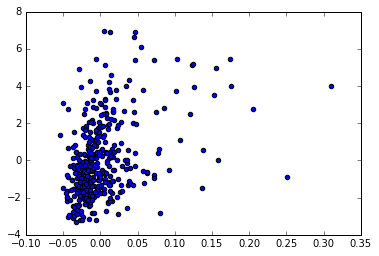

In [38]:
videocounts = data[(data['Videocounts']!=0)]['Normalized YT count']
score = data[(data['Videocounts']!=0)]['Normalized Score 2']
plt.scatter(videocounts,score)

In [36]:
import scipy

In [37]:
guess = [x*scipy.special.binom(10,x)*scipy.special.binom(8,10-x) for x in range(10,1,-1)]
guess2 = [scipy.special.binom(10,x)*scipy.special.binom(8,10-x) for x in range(10,1,-1)]

In [38]:
print(np.sum(guess)/scipy.special.binom(18,10))
print(np.sum(guess2[:1])/scipy.special.binom(18,10))
print(np.sum(guess2[:2])/scipy.special.binom(18,10))
print(np.sum(guess2[:3])/scipy.special.binom(18,10))
print(np.sum(guess2[:4])/scipy.special.binom(18,10))
print(np.sum(guess2[:5])/scipy.special.binom(18,10))

5.55555555556
2.28529640294e-05
0.00185109008638
0.0306458247635
0.184217743041
0.520156314274


In [40]:
guess_final = [scipy.special.binom(10,x)*scipy.special.binom(16,10-x) for x in range(10,0,-1)]
print(np.sum(guess_final[:1])/scipy.special.binom(26,10))
print(np.sum(guess_final[:2])/scipy.special.binom(26,10))
print(np.sum(guess_final[:3])/scipy.special.binom(26,10))
print(np.sum(guess_final[:4])/scipy.special.binom(26,10))
print(np.sum(guess_final[:5])/scipy.special.binom(26,10))
print(np.sum(guess_final[:6])/scipy.special.binom(26,10))

1.88262403904e-07
3.03102470285e-05
0.00104692722811
0.0136981607704
0.0856520515425
0.292879256966


In [24]:
total_small = np.hstack([data[features].as_matrix(),countries,languages])
test_total_small = np.hstack([test_data[features].as_matrix(),countries_test,languages_test])
target = data[target_features].as_matrix()

cross_sets = 10
input_data_small_cross = np.array_split(total_small,cross_sets)
target_data_small_cross = np.array_split(target,cross_sets)

nr_estimators = 1000
max_features = 12
learning_rate = 0.01
max_depth = 4

for max_features in range(9,13,1):
    mse_boost = 0
    for i in range(cross_sets):
        train_input_small_data = np.concatenate([input_data_small_cross[l] for l in range(len(input_data_cross)) if l!=i])
        train_target_small_data = np.concatenate([target_data_small_cross[l] for l in range(len(target_data_cross)) if l!=i])
        validation_input_data = input_data_small_cross[i]
        validation_target_data = target_data_small_cross[i]
        boost = GradientBoostingRegressor(n_estimators=nr_estimators,verbose=0,max_features= max_features,learning_rate=learning_rate,max_depth=max_depth,subsample=subsample)
        boost = boost.fit(train_input_small_data,np.ravel(train_target_small_data))

        predictions_small = boost.predict(validation_input_data)
        mse_boost += np.dot(predictions_small - np.ravel(validation_target_data),predictions_small - np.ravel(validation_target_data))

    print(subsample,learning_rate,max_features,nr_estimators,mse_boost/float(data['Score'].size))

(1, 0.01, 9, 1000, 3.212984927472879)
(1, 0.01, 10, 1000, 3.2173802449024311)
(1, 0.01, 11, 1000, 3.1965427940259685)
(1, 0.01, 12, 1000, 3.2025259152330068)


In [29]:
data_set = data[(data['Language']=='English') ]['Normalized Score']*24
print i, data_set.mean(),  data_set.std(), data_set.count()
data_set = data[(data['Language']!='English') ]['Normalized Score']*24
print i, data_set.mean(),  data_set.std(), data_set.count()

9 69.4217159307 53.0843533437 503
9 56.0027317348 44.996555317 321


In [30]:
data_set = data[(data['Experienced artist']==1) ]['Normalized Score']*24
print i, data_set.mean(),  data_set.std(), data_set.count()
data_set = data[(data['Experienced artist']==0) ]['Normalized Score']*24
print i, data_set.mean(),  data_set.std(), data_set.count()

9 64.6527689617 51.1107526251 490
9 63.5213868526 49.6269028297 334


In [31]:
data_set = data[(data['Scandinavia']==1) ]['Normalized Score']*24
print data_set.mean(),  data_set.std(), data_set.count()
data_set = data[(data['Scandinavia']!=1) ]['Normalized Score']*24
print data_set.mean(),  data_set.std(), data_set.count()

93.3001597542 64.0399030473 72
61.4074315129 48.1312761931 752


In [32]:
data_set = data[(data['Male singer']==1) & (data['Experienced artist']==1)]['Normalized Score']*24
print data_set.mean(),  data_set.std(), data_set.count()
data_set = data[(data['Male singer']==1) & (data['Experienced artist']==0)]['Normalized Score']*24
print data_set.mean(),  data_set.std(), data_set.count()
data_set = data[(data['Male singer']==0) & (data['Experienced artist']==1)]['Normalized Score']*24
print data_set.mean(),  data_set.std(), data_set.count()
data_set = data[(data['Male singer']==0) & (data['Experienced artist']==0)]['Normalized Score']*24
print data_set.mean(),  data_set.std(), data_set.count()

64.867614099 50.4602818864 206
65.8310709734 50.8770248734 164
64.4969305875 51.6656655468 284
61.2932209948 48.4360405295 170


In [33]:
data_set = data[(data['Country']=='Russia') ]['Normalized Score']*24
print i, data_set.mean(),  data_set.std(), data_set.count()
data_set = data[(data['Country']!='Russia') ]['Normalized Score']*24
print i, data_set.mean(),  data_set.std(), data_set.count()

9 111.394301148 56.9819860854 24
9 62.7781709656 49.629961067 800


In [39]:
print data.sort_values(['Normalized YT count'],ascending=False)[['Year','Country','Artist','Song','Normalized YT count','Videocounts','Normalized Score 2']][:10]

     Year     Country                   Artist  \
519  2010     Germany           Lena[125][126]   
790  2015  Azerbaijan           Elnur Huseynov   
707  2014     Armenia                 Aram MP3   
599  2012      Russia    Buranovskiye Babushki   
775  2015      Russia          Polina Gagarina   
727  2014      Poland           Donatan�&�Cleo   
698  2013     Denmark        Emmelie de Forest   
667  2013  Azerbaijan           Farid Mammadov   
470  2010      Serbia  Milan Stankovi?[67][68]   
656  2013  Montenegro                  Who See   

                               Song  Normalized YT count  Videocounts  \
519                     "Satellite"             0.310416      6753354   
790              "Hour of the Wolf"             0.251126      5574686   
707                     "Not Alone"             0.205550      3042587   
599           "Party for Everybody"             0.175876      2601321   
775              "A Million Voices"             0.173776      5421272   
727  "My S?

In [49]:
print data.sort_values(['Normalized YT count'],ascending=False)[['Year','Country','Artist','Song','Normalized YT count','Videocounts','Normalized Score 2']][-10:]

     Year    Country              Artist                    Song  \
488  2010    Ukraine   Alyosha[100][101]          "Sweet People"   
651  2013    Croatia        Klapa s Mora               "Mi?erja"   
733  2014  Macedonia              Tijana            "To the Sky"   
660  2013    Ireland          Ryan Dolan    "Only Love Survives"   
648  2013    Austria       Nat�lia Kelly                 "Shine"   
776  2015    Denmark   Anti Social Media       "The Way You Are"   
781  2015    Ireland      Molly Sterling  "Playing with Numbers"   
737  2014    Romania  Paula Seling�&�Ovi               "Miracle"   
615  2012    Georgia       Anri Jokhadze           "I'm a Joker"   
659  2013    Moldova         Aliona Moon                 "O mie"   

     Normalized YT count  Videocounts  Normalized Score 2  
488            -0.043983        95542            0.640867  
651            -0.044311       144222           -1.625000  
733            -0.044481       142723           -2.033333  
660        

In [40]:
# from http://blog.datadive.net/prediction-intervals-for-random-forests/
def pred_ints(model, X, percentile=95):
    err_down = []
    err_up = []
    for x in range(len(X)):
        preds = []
        for pred in model.estimators_:
            preds.append(pred[0].predict(np.reshape(X[x],(1,len(X[x]))))[0])
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))
    return err_down, err_up

In [90]:
countries_voting = test_data['Countries Voting'].mean()
upper_lower = np.array(pred_ints(tuned_boost,test_total,percentile=95))*countries_voting*2

In [91]:
error_means = np.vstack([np.array(test_data['Country']),np.array(predictions),upper_lower])
sorted_error_means = error_means[:,error_means[1].argsort()[::-1]]

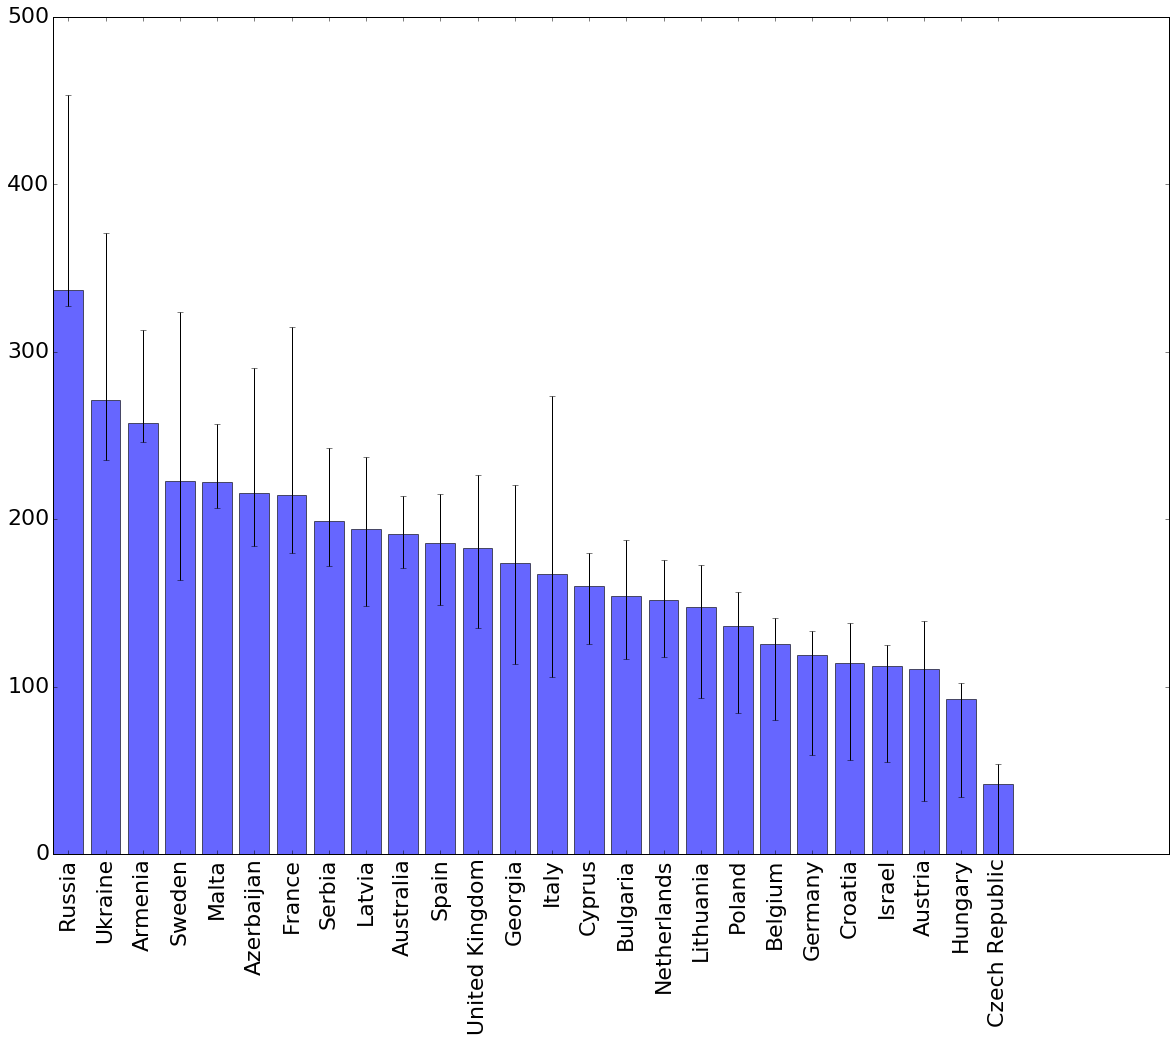

In [95]:
#import matplotlib
matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,15))
ind = np.arange(sorted_error_means.shape[1])
fig = plt.bar(ind, sorted_error_means[1],color='b', yerr = np.abs(sorted_error_means[2:]),ecolor='black',alpha=0.6)
plt.xticks(ind+0.4,sorted_error_means[0],rotation='vertical')
plt.ylim([0,500])
plt.show()

In [55]:
print data[data['Country']=='Italy'].shape[0]
print data[data['Country']=='Italy']['Normalized Score 2']
print data[data['Country']=='Italy']['Score']

5
572    2.075349
631    0.173993
703    1.000000
753   -1.338877
823    5.151852
Name: Normalized Score 2, dtype: float64
572    189
631    101
703    126
753     33
823    292
Name: Score, dtype: int64


In [114]:
sv_regressor = svm.SVR()

kernel = 'rbf' # ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
tol = 1e-3
C = 1.0
epsilon = 0.1

param_grid = {'kernel':['rbf','linear','poly','sigmoid'],
              'tol':np.logspace(-5,-1,5),
              'C':np.logspace(-2,2,5),
              'epsilon':np.logspace(-3,1,5)
             }
est = svm.SVR()
gs_cv = GridSearchCV(est,param_grid,n_jobs =4).fit(total,np.ravel(target))
print gs_cv.best_params_
print gs_cv.best_score_

{'epsilon': 1.0, 'C': 0.10000000000000001, 'tol': 0.10000000000000001, 'kernel': 'linear'}
0.122389648106


In [120]:
cross_sets = 10
input_data_cross = np.array_split(total,cross_sets)
target_data_cross = np.array_split(target,cross_sets)

kernel = 'linear'
tol = 0.1
epsilon = 1.0
C = 0.1


mse_vector = 0
for i in range(cross_sets):
        train_input_data = np.concatenate([input_data_cross[l] for l in range(len(input_data_cross)) if l!=i])
        train_target_data = np.concatenate([target_data_cross[l] for l in range(len(target_data_cross)) if l!=i])
        validation_input_data = input_data_cross[i]
        validation_target_data = target_data_cross[i]
        vector = svm.SVR(kernel=kernel,tol=tol,epsilon=epsilon,C=C)
        vector = vector.fit(train_input_data,np.ravel(train_target_data))

        predictions_vector = vector.predict(validation_input_data)
        mse_vector  += np.dot(predictions_vector  - np.ravel(validation_target_data),predictions_vector  - np.ravel(validation_target_data))

print(mse_vector/float(data.shape[0]))

3.59790833559


In [115]:
sv_regressor = svm.SVR(kernel='linear',tol=0.1,epsilon=1.0,C=0.1)
sv_regressor = sv_regressor.fit(total,np.ravel(target))

In [116]:
sorted(zip(test_data['Country'],sv_regressor.predict(test_total)),key = lambda x: x[1], reverse=True)

[('Armenia', 1.6044675161957922),
 ('Russia', 1.308225855629088),
 ('Ukraine', 0.88501891889344808),
 ('Sweden', 0.73272799833311941),
 ('Georgia', 0.64077048978179563),
 ('Serbia', 0.25811195270535525),
 ('Azerbaijan', 0.21891347232583325),
 ('Malta', 0.087139382539935584),
 ('Latvia', 0.020753095003171129),
 ('United Kingdom', -0.024985549295123199),
 ('Austria', -0.13265743957473364),
 ('Australia', -0.2439417575351181),
 ('Croatia', -0.24465417304616638),
 ('Spain', -0.25848997784260636),
 ('Lithuania', -0.40623536979170799),
 ('Israel', -0.57049267603051312),
 ('Cyprus', -0.61797597672532234),
 ('Bulgaria', -0.63909479029102723),
 ('Italy', -0.69006204615408229),
 ('Germany', -0.69241282723228181),
 ('Hungary', -0.71167823041006739),
 ('France', -0.92315787478828193),
 ('Poland', -1.0363627448106041),
 ('Netherlands', -1.167533406780541),
 ('Belgium', -1.5268500909816223),
 ('Czech Republic', -1.7127040321990834)]

In [122]:
total = np.hstack([data[features].as_matrix(),countries,languages])
test_total = np.hstack([test_data[features].as_matrix(),countries_test,languages_test])
data['log rank'] = data['Rank'].apply(np.log10)
target_rank = data['log rank'].as_matrix()

In [124]:
param_grid = {'learning_rate':[0.001,0.002,0.005,0.01],
              'max_depth':[2,3,4,5,6],
              'min_samples_leaf':[1,3,5,7],
              'max_features':[6,8,10,12,14,16],
              'n_estimators':[1000],
              'loss':['lad']
             }
est = GradientBoostingRegressor()
gs_cv = GridSearchCV(est,param_grid,n_jobs=4).fit(total,np.ravel(target_rank))
print gs_cv.best_params_
print gs_cv.best_score_

{'loss': 'lad', 'learning_rate': 0.01, 'min_samples_leaf': 3, 'n_estimators': 1000, 'max_features': 6, 'max_depth': 6}
0.133398451705


In [127]:
param_grid = {'learning_rate':[0.001,0.002,0.005,0.01],
              'max_depth':[6,7,8,9],
              'min_samples_leaf':[3],
              'max_features':[6],
              'n_estimators':[1000,2000,5000,10000],
              'loss':['lad']
             }
est = GradientBoostingRegressor()
gs_cv = GridSearchCV(est,param_grid,n_jobs=4).fit(total,np.ravel(target_rank))
print gs_cv.best_params_
print gs_cv.best_score_

{'loss': 'lad', 'learning_rate': 0.01, 'min_samples_leaf': 3, 'n_estimators': 1000, 'max_features': 6, 'max_depth': 7}
0.138509668504


In [129]:
log_ranking_model = GradientBoostingRegressor(n_estimators=1000,loss='lad',learning_rate=0.01,max_depth=7,max_features=6,min_samples_leaf=3)
log_ranking_model = log_ranking_model.fit(total,np.ravel(target_rank))

In [130]:
predictions_final_rank = log_ranking_model.predict(test_total)
print(sorted(zip(test_data['Country'],predictions_final_rank),key = lambda x: x[1], reverse=False))

[('Russia', 0.66133236379329685), ('Azerbaijan', 0.72543614476447027), ('Ukraine', 0.7726187636535895), ('Armenia', 0.88614407585088162), ('Sweden', 0.90765745483890126), ('Serbia', 0.91762156472365519), ('Malta', 1.01311979942653), ('Latvia', 1.0189407206205263), ('Italy', 1.0520910058680499), ('Australia', 1.0656019691580119), ('Poland', 1.0986435555142533), ('Netherlands', 1.1081608562697247), ('Croatia', 1.1096107672722375), ('Georgia', 1.1104828187671325), ('Bulgaria', 1.1165080548120783), ('Spain', 1.1217352866886545), ('United Kingdom', 1.1266469432684663), ('Lithuania', 1.1336016793073753), ('Belgium', 1.1418070234091515), ('Cyprus', 1.151729838263253), ('Israel', 1.1607492905518819), ('Hungary', 1.1711930192470612), ('France', 1.1889141284443998), ('Germany', 1.2026702546117265), ('Austria', 1.2427341170432908), ('Czech Republic', 1.2454163423087545)]


In [170]:
test_total_semi1 = np.hstack([test_data_sf1[features].as_matrix(),countries_test_sf1,languages_test_sf1])
predictions_semi1_rank = log_ranking_model.predict(test_total_semi1)
print(sorted(zip(test_data_sf1['Country'],predictions_semi1_rank),key = lambda x: x[1], reverse=False))

[('Azerbaijan', 0.44976143363467469), ('Russia', 0.63388781850080334), ('Bosnia and Herzegovina', 0.74877582129871567), ('Greece', 0.7710415923623315), ('Armenia', 0.79535039795244045), ('Malta', 0.79710466866030283), ('Estonia', 0.95960090029962386), ('Iceland', 0.97883762486919978), ('Netherlands', 1.0372029758668868), ('Moldova', 1.0372213576616571), ('Hungary', 1.0565475638099637), ('Montenegro', 1.0713560984911528), ('Cyprus', 1.0878136053779914), ('Croatia', 1.0918992794137106), ('Finland', 1.0971986566691849), ('Czech Republic', 1.1146757186258214), ('Austria', 1.145929346504855), ('San Marino', 1.1513636843194943)]


In [161]:
test_total_semi2 = np.hstack([test_data[features].as_matrix(),countries_test,languages_test])
predictions_semi2_rank = log_ranking_model.predict(test_total_semi1)
print(sorted(zip(test_data['Country'],predictions_semi2_rank),key = lambda x: x[1], reverse=False))

[('Ukraine', 0.57822711646559899), ('Lithuania', 0.71275873406504997), ('Ireland', 0.76178032481217728), ('Albania', 0.77225703329047934), ('Belgium', 0.82738540238381986), ('Poland', 0.84216433349578357), ('Denmark', 0.95927272331977664), ('Serbia', 0.99977709954434812), ('Australia', 1.0245453061145451), ('Slovenia', 1.0314914838180498), ('Georgia', 1.041033286296402), ('Switzerland', 1.0429749522074996), ('Israel', 1.0709819480913962), ('Norway', 1.0912871717535517), ('Latvia', 1.106740115442272), ('Belarus', 1.1307848119670172), ('Bulgaria', 1.1366207083357864), ('Macedonia', 1.1900587139434571)]


In [110]:
data['Prediction error'] = 0.0
data['Predicted points'] = 0.0
for l in range(data.shape[0]):
    dpoint = total[l].reshape(1,-1)
    predicted_points = tuned_boost.predict(dpoint)
    actual_points = target[l]
    data.loc[l,'Prediction error'] = actual_points - predicted_points
    data.loc[l,'Predicted points'] = predicted_points

In [102]:
print data.sort_values(['Prediction error'],ascending=False)[['Year','Country','Artist','Normalized Score 2','Score','Rank','Prediction error','Date of contest']][:10]

     Year  Country                         Artist  Normalized Score 2  Score  \
728  2014  Austria                 Conchita Wurst            5.522222    169   
748  2014  Austria                 Conchita Wurst            5.607069    290   
91   2001  Estonia  Tanel Padar,?Dave Benton,?2XL            6.086957    198   
473  2010  Belgium               Tom Dice[72][73]            4.938235    167   
413  2009  Iceland                    Yohanna[68]            5.477778    174   
256  2006  Finland                          Lordi            5.267544    292   
806  2015   Sweden                 M?ns Zelmerl?w            6.976852    365   
7    1998   Israel             Dana International            4.560000    172   
61   2000  Denmark                 Olsen Brothers            5.708333    195   
279  2006  Finland                          Lordi            5.162471    292   

     Rank  Prediction error Date of contest  
728     1          5.596203      2014.05.08  
748     1          5.592036

In [104]:
print data[(data['Rank']!=1) & (data['Final']==1)].sort_values(['Prediction error'],ascending=False)[['Year','Country','Artist','Normalized Score 2','Score','Rank','Prediction error']][:10]

     Year         Country              Artist  Normalized Score 2  Score  \
15   1998  United Kingdom              Imaani            4.320000    166   
9    1998           Malta              Chiara            4.280000    165   
85   2001          France     Natasha St-Pier            3.652174    142   
114  2002           Malta           Ira Losco            4.416667    164   
140  2003         Belgium          Urban Trad            4.115385    165   
823  2015           Italy             Il Volo            5.151852    292   
94   2001         Denmark        Rollo & King            5.173913    177   
761  2014     Netherlands  The Common Linnets            4.201663    238   
37   1999         Iceland               Selma            3.826087    146   
45   1999         Germany             S�rpriz            3.565217    140   

     Rank  Prediction error  
15      2          4.707827  
9       3          4.316682  
85      4          4.134720  
114     2          4.082986  
140     2    

In [113]:
print data.sort_values(['Prediction error'],ascending=True)[['Artist','Country','Year','Normalized Score 2','Score','Rank','Prediction error']][:11]

                 Artist      Country  Year  Normalized Score 2  Score  Rank  \
791         Maria Olafs      Iceland  2015           -2.745098     14    15   
204    Martin Stenmarck       Sweden  2005           -1.647436     30    19   
790      Elnur Huseynov   Azerbaijan  2015           -0.887955     53    10   
438         The Toppers  Netherlands  2009           -2.552632     11    17   
724        Mei Finegold       Israel  2014           -2.811111     19    14   
108              Malene      Denmark  2002           -2.125000      7    24   
206          GreenJolly      Ukraine  2005           -1.647436     30    19   
820      Elnur Huseynov   Azerbaijan  2015           -0.923148     49    12   
469       Aisha[65][66]       Latvia  2010           -2.861765     11    17   
717    Cristina Scarlat      Moldova  2014           -2.940789     13    16   
210  Natalia Podolskaya       Russia  2005           -0.955128     57    15   

     Prediction error  
791         -3.225369  
204

In [109]:
for y in range(1998,2016):
    print data[(data['Final']==1) & (data['Year']==y)].sort_values(['Prediction error'],ascending=False)[['Year','Country','Artist','Score','Rank','Prediction error']]

    Year         Country              Artist  Score  Rank  Prediction error
7   1998          Israel  Dana International    172     1          4.905834
15  1998  United Kingdom              Imaani    166     2          4.707827
9   1998           Malta              Chiara    165     3          4.316682
17  1998     Netherlands             Edsilia    150     4          3.442051
0   1998         Croatia            Danijela    131     5          3.260341
19  1998         Belgium        M?lanie Cohl    122     6          2.627115
8   1998         Germany         Guildo Horn     86     7          1.635110
12  1998         Ireland         Dawn Martin     64     9          0.581611
21  1998          Norway     Lars Fredriksen     79     8          0.064686
6   1998          Poland             Sixteen     19    17         -0.351568
16  1998          Cyprus   Michael Hajiyanni     37    11         -0.436062
13  1998        Portugal           Alma Lusa     36    12         -0.442259
3   1998    

In [111]:
for y in range(1998,2016):
    print data[(data['Final']==1) & (data['Year']==y)].sort_values(['Predicted points'],ascending=False)[['Year','Country','Artist','Rank']]

    Year         Country              Artist  Rank
18  1998          Sweden        Jill Johnson    10
21  1998          Norway     Lars Fredriksen     8
23  1998          Turkey              T�zmen    14
22  1998         Estonia          Koit Toome    12
17  1998     Netherlands             Edsilia     4
1   1998          Greece            Thalassa    20
14  1998         Romania     M?lina Olinescu    22
20  1998         Finland                Edea    15
9   1998           Malta              Chiara     3
19  1998         Belgium        M?lanie Cohl     6
24  1998       Macedonia      Vlado Janevski    19
10  1998         Hungary             Charlie    23
0   1998         Croatia            Danijela     5
12  1998         Ireland         Dawn Martin     9
7   1998          Israel  Dana International     1
15  1998  United Kingdom              Imaani     2
16  1998          Cyprus   Michael Hajiyanni    11
13  1998        Portugal           Alma Lusa    12
8   1998         Germany       

In [151]:
data['Top 10'] = 0
data.loc[data['Rank']<11,'Top 10'] = 1
target_top10 = data['Top 10'].as_matrix()

In [152]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'learning_rate':[0.01],
              'max_depth':[1,2,3,4,5,6],
              'min_samples_leaf':[1,3,5,7],
              'max_features':[9,11,13,15,17,19,21,23],
              'n_estimators':[1000]
             }
est = GradientBoostingClassifier(n_estimators=1000)
gs_cv = GridSearchCV(est,param_grid,n_jobs=4).fit(total,np.ravel(target_top10))
print gs_cv.best_params_
print gs_cv.best_score_

{'max_features': 11, 'n_estimators': 1000, 'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 3}
0.651699029126


In [154]:
top10_model = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01,max_depth=3,max_features=11,min_samples_leaf=3,verbose=True)
top10_model = top10_model.fit(total,np.ravel(target_top10))

      Iter       Train Loss   Remaining Time 
         1           1.3793            0.75s
         2           1.3785            0.66s
         3           1.3777            0.60s
         4           1.3761            0.59s
         5           1.3751            0.58s
         6           1.3740            0.57s
         7           1.3732            0.56s
         8           1.3726            0.55s
         9           1.3714            0.55s
        10           1.3704            0.55s
        20           1.3609            0.54s
        30           1.3546            0.52s
        40           1.3475            0.50s
        50           1.3397            0.49s
        60           1.3329            0.48s
        70           1.3265            0.46s
        80           1.3210            0.46s
        90           1.3153            0.46s
       100           1.3100            0.45s
       200           1.2571            0.39s
       300           1.2193            0.33s
       40

In [172]:
predictions_top10 = top10_model.predict_proba(test_total_semi1)
print(sorted(zip(test_data_sf1['Country'],predictions_top10[:,1]),key = lambda x: x[1], reverse=True)[0:10])

[('Azerbaijan', 0.87548290642479787), ('Armenia', 0.85547767429510124), ('Russia', 0.79324956592822671), ('Bosnia and Herzegovina', 0.78027954718215276), ('Malta', 0.76424189445676405), ('Greece', 0.61464761221286746), ('Estonia', 0.534732488593471), ('Iceland', 0.47090568984037556), ('Cyprus', 0.46544433241862732), ('Netherlands', 0.43224972455326832)]


In [19]:
predictions_points_model = {'Russia':336,'Ukraine':271,'Armenia':257,'Sweden':223,'Malta':222,'Azerbaijan':215,'France':214,'Serbia':198,'Latvia':194,'Australia':190,'Spain':186,'United Kingdom':182,'Georgia':173,'Italy':167,'Cyprus':160,'Bulgaria':154,'Netherlands':151,'Lithuania':147,'Poland':136,'Belgium':125,'Germany':118,'Croatia':114,'Israel':112,'Austria':110,'Hungary':92,'Czech Republic':41}

In [20]:
actual_points = {'Russia':491,'Ukraine':534,'Armenia':249,'Sweden':261,'Malta':153,'Azerbaijan':117,'France':257,'Serbia':115,'Latvia':132,'Australia':511,'Spain':77,'United Kingdom':62,'Georgia':104,'Italy':124,'Cyprus':96,'Bulgaria':307,'Netherlands':153,'Lithuania':200,'Poland':229,'Belgium':181,'Germany':11,'Croatia':73,'Israel':135,'Austria':151,'Hungary':108,'Czech Republic':41}

In [21]:
rank_predictions_points = {'Russia':1,'Ukraine':2,'Armenia':3,'Sweden':4,'Malta':5,'Azerbaijan':6,'France':7,'Serbia':8,'Latvia':9,'Australia':10,'Spain':11,'United Kingdom':12,'Georgia':13,'Italy':14,'Cyprus':15,'Bulgaria':16,'Netherlands':17,'Lithuania':18,'Poland':19,'Belgium':20,'Germany':21,'Croatia':22,'Israel':23,'Austria':24,'Hungary':25,'Czech Republic':26}

In [22]:
actual_rank = {'Russia':3,'Ukraine':1,'Armenia':7,'Sweden':5,'Malta':12,'Azerbaijan':17,'France':6,'Serbia':18,'Latvia':15,'Australia':2,'Spain':22,'United Kingdom':24,'Georgia':20,'Italy':16,'Cyprus':21,'Bulgaria':4,'Netherlands':11,'Lithuania':9,'Poland':8,'Belgium':10,'Germany':26,'Croatia':23,'Israel':14,'Austria':13,'Hungary':19,'Czech Republic':25}

In [23]:
rank_predictions_rank = {'Russia':1,'Ukraine':3,'Armenia':4,'Sweden':5,'Malta':7,'Azerbaijan':2,'France':23,'Serbia':6,'Latvia':8,'Australia':10,'Spain':16,'United Kingdom':17,'Georgia':14,'Italy':9,'Cyprus':20,'Bulgaria':15,'Netherlands':12,'Lithuania':18,'Poland':11,'Belgium':19,'Germany':24,'Croatia':13,'Israel':21,'Austria':25,'Hungary':22,'Czech Republic':26}

In [24]:
bookmakers_rank = {'Russia':1,'Ukraine':3,'Armenia':7,'Sweden':4,'Malta':6,'Azerbaijan':21,'France':5,'Serbia':20,'Latvia':13,'Australia':2,'Spain':10,'United Kingdom':8,'Georgia':22,'Italy':15,'Cyprus':16,'Bulgaria':9,'Netherlands':11,'Lithuania':19,'Poland':18,'Belgium':14,'Germany':25,'Croatia':24,'Israel':17,'Austria':12,'Hungary':23,'Czech Republic':26}

In [25]:
forecast_rank = {'Sweden':1,'Austria':2,'Ukraine':3,'Australia':4,'Russia':5,'Italy':6,'Serbia':7,'Azerbaijan':8,'Belgium':9,'Germany':10,'Armenia':11,'Netherlands':12,'Malta':13,'United Kingdom':14,'Latvia':15,'Hungary':16,'France':17,'Spain':18,'Israel':19,'Cyprus':20,'Lithuania':21,'Georgia':22,'Bulgaria':23,'Croatia':24,'Czech Republic':25,'Poland':26}

In [22]:
mse = 0
predicted_total = 0
actual_total = 0
mse_norm = 0
#print list(predictions_points_model.keys)
for k in predictions_points_model:
    predicted_total += predictions_points_model[k]
    actual_total += actual_points[k]
    print k, predictions_points_model[k], actual_points[k], (predictions_points_model[k] - actual_points[k])**2
    mse += (predictions_points_model[k] - actual_points[k])**2
    mse_norm += (predictions_points_model[k]*float(4872)/4488 - actual_points[k])**2
print mse/26.0
print mse_norm/26.0
print predicted_total
print actual_total

Italy 167 124 1849
Czech Republic 41 41 0
Lithuania 147 200 2809
Malta 222 153 4761
France 214 257 1849
Georgia 173 104 4761
Israel 112 135 529
Australia 190 511 103041
Germany 118 11 11449
Armenia 257 249 64
Belgium 125 181 3136
Spain 186 77 11881
Ukraine 271 534 69169
Netherlands 151 153 4
Poland 136 229 8649
Sweden 223 261 1444
Latvia 194 132 3844
Croatia 114 73 1681
Russia 336 491 24025
Bulgaria 154 307 23409
Serbia 198 115 6889
Azerbaijan 215 117 9604
United Kingdom 182 62 14400
Austria 110 151 1681
Hungary 92 108 256
Cyprus 160 96 4096
12126.1538462
11672.5426873
4488
4872


In [21]:
rank_error_points = 0
rank_error_rank = 0
rank_error_bookmakers = 0
rank_error_forecast = 0
max_error = 0
worst_country = ""
for k in rank_predictions_points:
    log_points = math.log(rank_predictions_points[k])
    log_actual = math.log(actual_rank[k])
    log_rank = math.log(rank_predictions_rank[k])
    log_bookmakers = math.log(bookmakers_rank[k])
    log_forecast = math.log(forecast_rank[k])
    rank_error_points += abs(log_points - log_actual)
    rank_error_rank += abs(log_rank - log_actual)
    rank_error_bookmakers += abs(log_bookmakers - log_actual)
    rank_error_forecast += abs(log_forecast - log_actual)
    total_error = abs(log_points - log_actual) + abs(log_rank - log_actual) + abs(log_bookmakers - log_actual) + abs(log_forecast - log_actual)
    if(total_error > max_error):
        max_error = total_error
        worst_country = k
        
print rank_error_points
print rank_error_rank
print rank_error_bookmakers
print rank_error_forecast
print worst_country
    

15.9056778437
16.718445451
9.36626145491
16.3629646631
Bulgaria


In [23]:
print predictions_points_model['Ukraine'] + predictions_points_model['Russia'] + predictions_points_model['Armenia']
print actual_points['Australia'] + actual_points['Ukraine'] + actual_points['Russia']

864
1536


In [34]:
ranking_points = np.zeros(26)
ranking_actual = np.zeros(26)
ranking_ranking = np.zeros(26)
ranking_bookmakers = np.zeros(26)
ranking_forecast = np.zeros(26)
i = 0
for k in rank_predictions_points:
    ranking_points[i] = rank_predictions_points[k]
    ranking_actual[i] = actual_rank[k]
    ranking_ranking[i] = rank_predictions_rank[k]
    ranking_bookmakers[i] = bookmakers_rank[k]
    ranking_forecast[i] = forecast_rank[k]
    i+=1
    
from scipy import stats
print stats.kendalltau(ranking_points,ranking_actual)
print stats.kendalltau(ranking_actual,ranking_actual)
print stats.kendalltau(ranking_ranking,ranking_actual)
print stats.kendalltau(ranking_bookmakers,ranking_actual)
print stats.kendalltau(ranking_forecast,ranking_actual)

KendalltauResult(correlation=0.34769230769230774, pvalue=0.012749345209398064)
KendalltauResult(correlation=1.0000000000000002, pvalue=7.8640679715061406e-13)
KendalltauResult(correlation=0.32923076923076927, pvalue=0.018351636110902753)
KendalltauResult(correlation=0.58153846153846167, pvalue=3.1019056463529269e-05)
KendalltauResult(correlation=0.27384615384615391, pvalue=0.049797658950308764)
